In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
names_by_year = {}
for year in range(1900, 2001, 10):
    names_by_year[year] = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [101]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

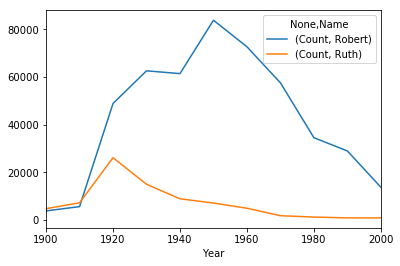

In [102]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

In [103]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

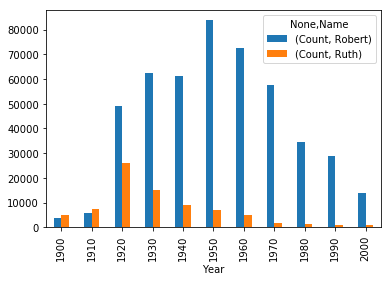

In [104]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

In [105]:
names_by_1950 = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob1950.txt',
        names=['Name','Gender','Count']
    )
names_R_for_pie = names_by_1950[(names_by_1950.Name.str.startswith("R"))].sort_values(by='Count', ascending=False).head(10)
names_R_for_pie

,Name,Gender,Count
6114,Robert,M,83575
6119,Richard,M,51014
6124,Ronald,M,29917
6139,Roger,M,12551
6143,Raymond,M,11180
35,Rebecca,F,9426
48,Ruth,F,7128
6163,Roy,M,6459
55,Rita,F,6425
6164,Ralph,M,6406


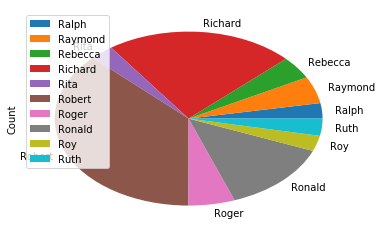

In [106]:
names_R_for_pie.groupby('Name').sum().plot.pie(y='Count')

In [107]:
names_by_year = {}
for year in range(1900, 2001, 10):
    names_by_year[year] = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
# print(names_all.head(10))
names_all_years = names_all.groupby(['Name']).sum().sort_values(by='Count', ascending=False).to_dict()
print(len(names_all_years['Count']))
# print(names_all_years)#['Count'])#.keys())) 
# names = []
# for name in range(len(names_all_years['Count'].keys())):
#     names.append(names_all_years['Count'].keys())
    
# values_ = []
# for values_ in range(len(names_all_years['Count'].values())):
#     values_.append(str(names_all_years['Count'].values()))
# print(*names_all_years['Count'].keys())
# print(*names_all_years['Count'].values())
# print(names)

45365


In [108]:
names_all_years.plot.scatter(y='Count')#(x='Name', y='Count')

AttributeError: 'dict' object has no attribute 'plot'

In [ ]:
def count(word):
    consonants = 0
    for letter in word:
        if letter.isalpha():
            if letter.lower() in 'aeiouy':
                continue
            else:
                consonants += 1
    return (consonants)

In [ ]:
cons = []
for i in range (len(names_all_years)):
    cons.append(count(names_all_years['Count'].keys()))
    print(cons)

In [ ]:
# names_all_years['Cons'] = names_all_years.apply(lambda row: count(row.Name), axis=1) 
# names_all

In [ ]:
def count_consonants(group):
#     plt.plot(group['Cons'], group['Count'], 'o', label=group.name)
    plt.plot(group[names], group[values_], 'o')
    
# names_all_years.groupby('Cons').apply(count_consonants)
plt.xlabel('consonants')
plt.ylabel('Count')
plt.legend()